In [1]:
# Library/module setup
from cv import * # NNMF cross-validation functions
import scipy.io as sio

%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Load PSTH data (.mat file)
orig_data = sio.loadmat('../data/nnmf_best.mat')
sio.whosmat('../data/nnmf_best.mat')

[('A', (641, 25), 'double'),
 ('D_res', (100, 1), 'double'),
 ('X', (641, 815), 'double'),
 ('Y', (25, 815), 'double'),
 ('k_best', (1, 1), 'double'),
 ('psth', (1, 1), 'struct')]

In [4]:
# Extract PSTH
data = orig_data['psth']['psth'][0,0] # PSTH array is in nnmf_best.psth.psth
print('data = firing rate PSTH of %i cells x %i tPoints' % data.shape)

data = firing rate PSTH of 815 cells x 641 tPoints


In [12]:
# Parameters
ranks = np.arange(1, 101) # range of components to test
replicates = 1 # number of repetitions??

In [13]:
# Initialize problem
train_err, test_err = [], []

In [14]:
# Fit NNMF models w various k components
for rnk, _ in itertools.product(ranks, range(replicates)):
    print('Fitting model with rank %i/%i ...' % (rnk, ranks[-1]))
    tr, te = cv_pca(data, rnk, nonneg=True)[2:]
    train_err.append((rnk, tr))
    test_err.append((rnk, te))
print('DONE.')

Fitting model with rank 1/100 ...
Fitting model with rank 2/100 ...
Fitting model with rank 3/100 ...
Fitting model with rank 4/100 ...
Fitting model with rank 5/100 ...
Fitting model with rank 6/100 ...
Fitting model with rank 7/100 ...
Fitting model with rank 8/100 ...
Fitting model with rank 9/100 ...
Fitting model with rank 10/100 ...
Fitting model with rank 11/100 ...
Fitting model with rank 12/100 ...
Fitting model with rank 13/100 ...
Fitting model with rank 14/100 ...
Fitting model with rank 15/100 ...
Fitting model with rank 16/100 ...
Fitting model with rank 17/100 ...
Fitting model with rank 18/100 ...
Fitting model with rank 19/100 ...
Fitting model with rank 20/100 ...
Fitting model with rank 21/100 ...
Fitting model with rank 22/100 ...
Fitting model with rank 23/100 ...
Fitting model with rank 24/100 ...
Fitting model with rank 25/100 ...


KeyboardInterrupt: 

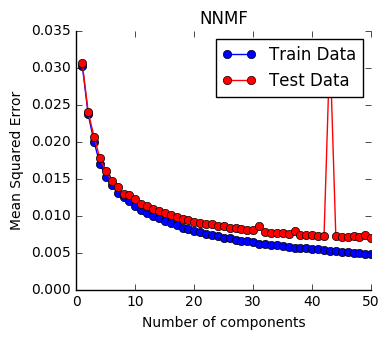

In [11]:
## Plot cross-validated train vs test errors

fig, ax = plt.subplots(1, 1, figsize=(4, 3.5))
ax.plot(*list(zip(*train_err)), 'o-b', label='Train Data')
ax.plot(*list(zip(*test_err)), 'o-r', label='Test Data')
ax.set_ylabel('Mean Squared Error')
ax.set_xlabel('Number of components')
ax.set_title('NNMF')
# ax.axvline(4, color='k', dashes=[2,2])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend()
fig.tight_layout()

# fig.savefig('../../img/pca-crossval/pca_cv_curve.pdf')

# TESTS

In [2]:
# Do dry run with artificial data generated by plot_nmf()
plot_nmf()

Fitting model with rank 1/7 ...
Fitting model with rank 2/7 ...
Fitting model with rank 3/7 ...
Fitting model with rank 4/7 ...
Fitting model with rank 5/7 ...
Fitting model with rank 6/7 ...
Fitting model with rank 7/7 ...
DONE.


In [3]:
# parameters
# N, R = 150, 4
# noise = .8
replicates = 1
ranks = np.arange(1, 8)

In [4]:
# initialize problem
# U = np.random.rand(N, R)
# Vt = np.random.rand(R, N)
# data = np.dot(U, Vt) + noise*np.random.rand(N, N)
train_err, test_err = [], []

In [5]:
# fit models
for rnk, _ in itertools.product(ranks, range(replicates)):
    print('Fitting model with rank %i/%i ...' % (rnk, ranks[-1]))
    tr, te = cv_pca(data, rnk, nonneg=True)[2:]
    train_err.append((rnk, tr))
    test_err.append((rnk, te))
print('DONE.')

Fitting model with rank 1/7 ...
Fitting model with rank 2/7 ...
Fitting model with rank 3/7 ...
Fitting model with rank 4/7 ...
Fitting model with rank 5/7 ...
Fitting model with rank 6/7 ...
Fitting model with rank 7/7 ...
DONE.
